# Cálculo - Tarefa 02

1- Calcule de forma numérica a integral da função $x^3$ avaliada entre os pontos $1$ e $2$. Identifique o número de retângulos que você usou.  


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation, PillowWriter 
from IPython.display import HTML
import warnings

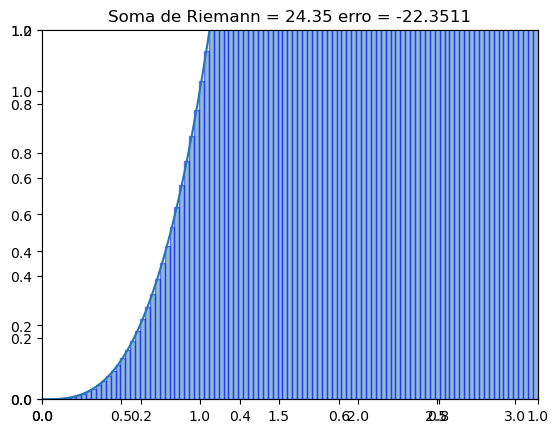

In [10]:
f = lambda x: x**3

def calcula_area(a, b, func, frame_num):
    num_bins=frame_num+1 # Quantidade de retângulos
    delta = (b-a)/num_bins # largura do retângulo
    x_cols = np.linspace(a, b-delta, num_bins)+delta/2 # Divisão do eixo X
    y_cols = f(x_cols) # alturas dos retângulos
    return sum(delta*y_cols)
    

def animate(n, a=0, b=np.pi, func=f, verdadeiro_valor = 2):
    
    plt.cla()  # Limpa o gráfico anterior para montar o próxim frame
    ax = plt.axes(xlim=(a, b), ylim = (0, 1.2))  # Monta o sistema de eixos
    
    # Plota a função
    x = np.linspace(a ,b, 100)
    y = f(x)
    ax.plot(x, y, '-');
    
    # Define as quebras e as alturas das colunas
    num_bins=n+1
    delta = (b-a)/num_bins
    x_cols = np.linspace(a, b-delta, num_bins)+delta/2
    y_cols = f(x_cols)

    # plota barras
    bar = ax.bar(x_cols, y_cols, alpha=.5, width = delta, edgecolor='blue')   

    # Área dos retângulos
    soma_riemann = calcula_area(a, b, func, n)
    
    # Erro
    erro = verdadeiro_valor - soma_riemann
    ax.set_title(f'Soma de Riemann = {soma_riemann:.2f} erro = {erro:.4f}')

    return bar
animate(100);

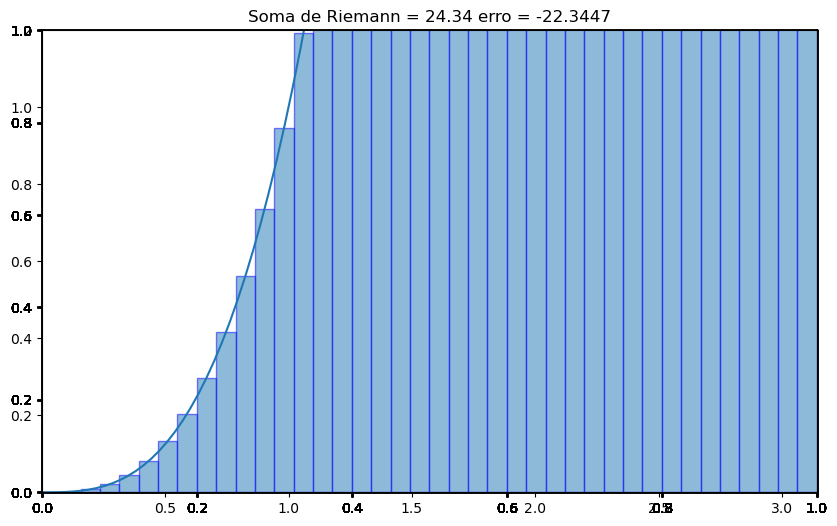

In [11]:
%matplotlib inline

fig = plt.figure(figsize=(10, 6))  # make a new figure
ax = plt.subplot(1,1,1)   

ani = FuncAnimation(fig, animate, frames=40, interval=120, blit=True)
# ani.save('riemann_sum2.gif',writer="imagemagick")
HTML(ani.to_jshtml())

2- Calcule essa área de forma analítica.

$\int_{1}^{2} x^3 \,dx\ =     \frac{1}{4}x^4\bigg|_{1}^{2}\ =     \frac{2^4}{4} - \frac{1^4}{4} =     4 - 0.25 =     3.75$